### Grading
The final score that you will receive for your programming assignment is generated in relation to the total points set in your programming assignment item—not the total point value in the nbgrader notebook.<br>
When calculating the final score shown to learners, the programming assignment takes the percentage of earned points vs. the total points provided by nbgrader and returns a score matching the equivalent percentage of the point value for the programming assignment. <br>
**DO NOT CHANGE VARIABLE OR METHOD SIGNATURES** The autograder will not work properly if your change the variable or method signatures. 

### Validate Button
Please note that this assignment uses nbgrader to facilitate grading. You will see a **validate button** at the top of your Jupyter notebook. If you hit this button, it will run tests cases for the lab that aren't hidden. It is good to use the validate button before submitting the lab. Do know that the labs in the course contain hidden test cases. The validate button will not let you know whether these test cases pass. After submitting your lab, you can see more information about these hidden test cases in the Grader Output. <br>
***Cells with longer execution times will cause the validate button to time out and freeze. Please know that if you run into Validate time-outs, it will not affect the final submission grading.*** <br>

# Module 3: Logistic Regression

In [1]:
# importing all the required libraries

from math import exp
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


### Binary classification with logistic regression. 

**Part A [5 points]** : Your first task is to complete the function `gen_logistic` in the following cell so as to be able to generate the logistic function for a given input. The logistic function is a type of <em>sigmoid</em> function which has an 'S'-shape and 'squashes' its inputs to a value lying in the range [0,1]. Other sigmoid functions include the hyperbolic-tangent funcition (`tanh(x)`) and the error function (`erf(x)`).[https://en.wikipedia.org/wiki/Sigmoid_function]

In [2]:
def gen_logistic(x, w=1, b=0):
    """
    outputing the logistic output for an input x
    :param x: scalar or numpy array of shape (n_samples, n_features). If only one feature, it must have the shape of (n_samples,1).
    :param w: weight(s); either scalar or numpy array of shape (1, n_features)
    :param b: bias; either scalar or numpy array of shape (1,)
    returns y of shape (n_samples,)
    """    
    # TODO: Finish this function to return the output of applying the sigmoid
    # function to the input x (Please do not use external libraries) store 
    # the output in y and return y. Do not change the default parameter values.
    # Hint: This function will be used in any input shape scalar (0d), 1d vector, and 2d arrays. Please make sure it can handle all those. Following reshaping codes might help.
    # Hint2: You may use design matrix using concatenation, but it is not necesary.
    
    y =0 
    if np.isscalar(x):
      x = np.array(x).reshape((1,1))
    if np.isscalar(w):
      w = np.array(w).reshape((1,1))
    if np.isscalar(b):
      b = np.array(b).reshape((1,1))  
    if b.shape==(1,):
      b= b.reshape((1,1))  

    # your code here
    #y = w * x + b
    #y = 1/(1+exp(1)**(-x))
    y = 1/(1+np.exp(-x))
    
    return y.reshape(y.shape[0],)

In [3]:
# tests that gen_logistic function returns the output of applying the sigmoid function to the input x
# ouput is stored and returned in y 

**Part B [5 points, Peer Review]:** Generate a vector x of length N with values lying between limits Xa and Xb (for this you will have to choose your own limits; play around with different values) and apply the `gen_logistic` function to this vector.  Proceed to plot the output and verify the shape of the output. If your decision boundary value is about the center of your x range, you will see an S-shape. Complete the Peer Review section for this section.

Text(0.5, 1.0, 'Logistic/Sigmoid Function')

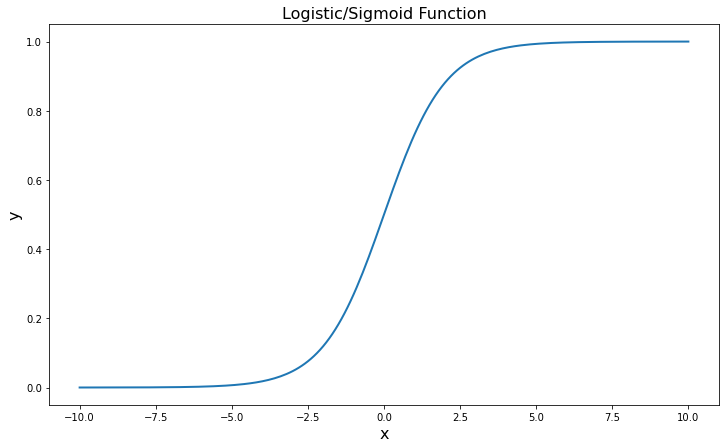

In [34]:
# your code here

# TODO: change the values of N, a and b below to check how the output of your function works
# Use a value for N greater than 1 and any limits a and b so that an S-shape graph is generated

N = 201#1
Xa = -10
Xb = 10
w = .5#1
b = 5.1#0

x = np.expand_dims(np.linspace(Xa,Xb,N), axis=1)
y = gen_logistic(x, w, b)


fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
ax.plot(x,y, lw=2)
ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("y", fontsize=16)
ax.set_title("Logistic/Sigmoid Function", fontsize=16)


***1. Increasing w will make the curve transition sharply: [2 pts, True/False]***

In [5]:
# uncomment sharp_transition and answer qustion 1. above 
# replace string with 'True' or 'False' 
# your code here

sharp_transition = 'True'

In [6]:
# this cell tests sharp_transition

***2. If b increases by 1, then the decision boundary x decreases by 1: [3 pts, True/False]***

In [7]:
# uncomment x_decreases_by_1 and answer question 2. above
# replace string with 'True' or 'False' 
# your code here

x_decreases_by_1 = 'False'

In [8]:
# this cell tests x_decreases_by_1

**PART C [10 pts, Peer Review]:** Performing binary classification using logistic regression on the breast-cancer dataset. In this part you will be exposed to different methods within the scikit-learn LogisticRegression class so you can build a classifier.

**Import breast cancer dataset from sklearn** [5 pts]

In [9]:
# Importing the breast-cancer dataset from sklearn datasets

class BC_data:
    """
    class to import the breast cancer dataset from sklearn
    
    """
    def __init__(self):
        
        x, y = load_breast_cancer(return_X_y= True)
        self.x_train = None 
        self.x_test = None 
        self.y_train = None 
        self.y_test = None
        
        #TODO: Split the data into training and test data (use train_test_split sklearn) 
        # such that the test data size is 25% of total number of observations
        # No need to rescale the data. Use the data as is.
        
        # your code here
        #x_train, x_test= train_test_split(load_breast_cancer,test_size=0.25)
        self.x_train, self.x_test, self.y_train, self.y_test= train_test_split(x,y,test_size=0.25)
        
        
data = BC_data()

In [10]:
# tests that you properly split data into training and test data 
# such that test dat size is 25% of the total number of observations


**Build and Fit Logistic Regression Model [5 pts]**

In [11]:
# TODO: Use the data object and then train the logistic regression model. 
# 1. Change the code below to build your model called LogReg
# 2. Fit the model to the train data

LogReg = None

# your code here
LogReg = LogisticRegression(random_state = 0)
LogReg.fit(data.x_train, data.y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
# weights 
LogReg.coef_

array([[ 1.33924246,  0.41874962,  0.0648469 , -0.00439714, -0.05730885,
        -0.24972767, -0.34935918, -0.14562574, -0.08255069, -0.01968989,
         0.03086917,  0.42239401,  0.16089863, -0.08606846, -0.0049731 ,
        -0.04915717, -0.07273723, -0.01837813, -0.01988645, -0.00597919,
         1.36294621, -0.43846132, -0.19111625, -0.02203972, -0.10578022,
        -0.77591638, -0.99536626, -0.28356494, -0.23397712, -0.08713826]])

In [13]:
# tests LogReg model 

In the next cell, compute the ROC curve and the area under the curve and plot the ROC curve. Upload a copy or screenshot of the plot for this week's **Peer Review assignment**. 

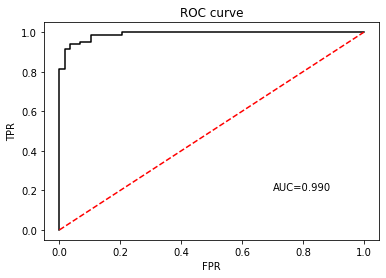

In [14]:
# TODO: compute the area under the curve and plot ROC curve
# Plot the ROC curve ( True positive rate v/s False positive rate) and indicate the AUC on the plot


# your code here
ypp = LogReg.predict_proba(data.x_test)
fpr,tpr,th = roc_curve(data.y_test,ypp[:,1])
auc = roc_auc_score(data.y_test,ypp[:,1])
plt.plot(fpr,tpr,'k-')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),'r--')
plt.title('ROC curve');
plt.xlabel('FPR');
plt.ylabel('TPR');
plt.text(0.7,0.2,'AUC='+"{:.3F}".format(auc));

In [27]:
print (len(ypp))

143


**Part D [5 pts, Peer Review]:** Here we will use the trained model coefficients and generate the `classification probabilities` using the `gen_logistic` function we built. The goal of this section is to make you understand how logistic regression classifies data points during and after training. Using the predictions from the generated probabilities, you will compute the precision and recall metrics (defined below).

In [15]:
def calculate_precision(y_true, y_pred, pos_label_value=1.0):
    '''
    This function accepts the labels and the predictions, then
    calculates precision for a binary classifier.
    
    Args
        y_true: np.ndarray
        y_pred: np.ndarray
        
        pos_label_value: (float) the number which represents the postiive
        label in the y_true and y_pred arrays. Other numbers will be taken
        to be the non-positive class for the binary classifier.
    
    Returns precision as a floating point number between 0.0 and 1.0
    '''
    
    
    # your code here
    from sklearn import metrics
    metrics.confusion_matrix(y_true, y_pred)
    
    return metrics.precision_score(y_true,y_pred)#0.0

def calculate_recall(y_true, y_pred, pos_label_value=1.0):
    '''
    This function accepts the labels and the predictions, then
    calculates recall for a binary classifier.
    
    Args
        y_true: np.ndarray
        y_pred: np.ndarray
        
        pos_label_value: (float) the number which represents the postiive
        label in the y_true and y_pred arrays. Other numbers will be taken
        to be the non-positive class for the binary classifier.
    
    Returns precision as a floating point number between 0.0 and 1.0
    '''
    
    # your code here
    from sklearn import metrics
    metrics.confusion_matrix(y_true, y_pred)    
    
    return metrics.recall_score(y_true,y_pred)#0.0

In [16]:
# testing cell 
# Sanity check tests
ut_true = np.array([1.0, 1.0, 0.0, 0.0])
ut_pred = np.array([1.0, 1.0, 1.0, 1.0])
prec = calculate_precision(ut_true, ut_pred, 1.0)
recall = calculate_recall(ut_true, ut_pred, 1.0)

In the next cell you will generate the predictions for the test data `data.x_test` and compute prediction and recall metrics by calling the functions you built above. Take a screenshot of your code to submit for your **Peer Review assignment**. Make sure that you use the ***gen_logistic function***.

In [25]:
print (data.x_test)#143 length

[[1.234e+01 2.686e+01 8.115e+01 ... 1.459e-01 3.215e-01 1.205e-01]
 [8.196e+00 1.684e+01 5.171e+01 ... 2.564e-02 3.105e-01 7.409e-02]
 [1.161e+01 1.602e+01 7.546e+01 ... 1.105e-01 2.787e-01 7.427e-02]
 ...
 [9.904e+00 1.806e+01 6.460e+01 ... 9.910e-02 2.614e-01 1.162e-01]
 [1.469e+01 1.398e+01 9.822e+01 ... 1.108e-01 2.827e-01 9.208e-02]
 [1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]]


In [30]:
##For peer review submission purposes.  The code does not yet work

LogRegModel = LogisticRegression(random_state = 0)
LogRegModel.fit(data.x_test, data.y_test)

# weights = LogRegModel.coef_
# bias = LogRegModel.intercept_

for x in data.x_test:
    print (gen_logistic(x, weights, bias))

w = LogRegModel.coef_
b = LogRegModel.intercept_

p = gen_logistic(data.x_test, w, b)
y_pred = p > 0.5

# y_pred

[0.99999563 1.         1.         1.         0.52582699 0.53377349
 0.52709842 0.51140302 0.54842276 0.51733555 0.59996037 0.85924097
 0.9335162  1.         0.50227448 0.50961132 0.50940639 0.50330245
 0.50469486 0.501418   0.99999984 1.         1.         1.
 0.54450689 0.61552576 0.60885457 0.53641043 0.57968977 0.5300886 ]
[0.99972432 0.99999995 1.         1.         0.52148676 0.51485313
 0.50396992 0.50147925 0.54411003 0.51625177 0.53899564 0.7224606
 0.7491342  0.99972679 0.50224198 0.50411491 0.50396992 0.50147925
 0.50643464 0.5006455  0.99987208 1.         1.         1.
 0.53237962 0.53387304 0.51719322 0.50640965 0.5770073  0.51851403]
[0.99999093 0.99999989 1.         1.         0.5271732  0.52916685
 0.51773506 0.51124061 0.54701074 0.51579474 0.56109322 0.67566052
 0.84117543 0.99999987 0.501471   0.50501233 0.50657712 0.50325995
 0.50461987 0.5004955  0.99999676 1.         1.         1.
 0.53531609 0.55403812 0.5572972  0.52759693 0.56922748 0.51855897]
[0.99999969 1.   

In [18]:
# TO-DO : Generate predicted y values using coefficients of the fit logistic regression model for data.x_test
# Then compute and print the precision and recall metrics 


y_pred = 0 # Fill the correctly generated predictions in this variable
# your code here
y_pred = LogReg.predict(data.x_test)

#y_pred = gen_logistic(data.x_test)


precision = calculate_precision(data.y_test, y_pred)
recall = calculate_recall(data.y_test, y_pred)



print('Model Precision : %0.2f' % precision)
print('Model Recall : %0.2f' % recall)


Model Precision : 0.94
Model Recall : 0.95
